In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyvista as pv
import torch
import seaborn as sns
from os import listdir
from os.path import isfile, join
import multiprocessing
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import dataframe_image as dfi

In [2]:
mypath = '../../data/MLgSA/New_wss/'
onlyfiles = np.asarray([f for f in listdir(mypath) if isfile(join(mypath, f))])
onlyfiles.sort()
print(len(onlyfiles))
# short_list = np.asarray([s[5:23] if s[19] == 'l' else s[5:24] for s in onlyfiles])

30


In [4]:
meshes = []

for f in onlyfiles:
    reader = pv.get_reader(mypath + f)
    meshes.append(reader.read())

In [22]:
l = meshes[0].array_names

In [124]:
def minmaxer(d, a=None, b=None):
    if a is None and b is None:
        a = np.min(d)
        b = np.max(d)
    return (d-a) * 2/(b-a) - 1

In [20]:
np.asarray(meshes[0].point_data.values()).shape

(4, 12956)

In [21]:
dl = []

In [22]:
for mesh in meshes:
    dl.append(np.asarray(mesh.point_data.values()))

In [23]:
data = np.concatenate(dl, axis=1)

In [24]:
data.shape

(4, 752865)

In [80]:
mins = np.min(data, axis=1)
print(mins)

[-6.96069077e+02  1.54482502e-06 -3.88252846e+02  1.17441243e-06]


In [81]:
maxs = np.max(data, axis=1)
print(maxs)

[1150.64635386 1179.59597519  366.13309255  388.31248965]


In [33]:
mesh = np.asarray(meshes[0].point_data.values())

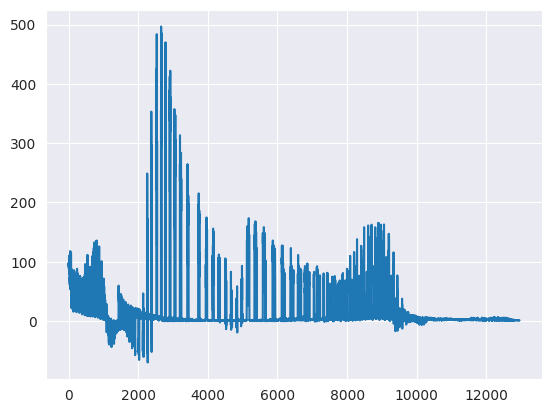

In [35]:
plt.plot(mesh[0])

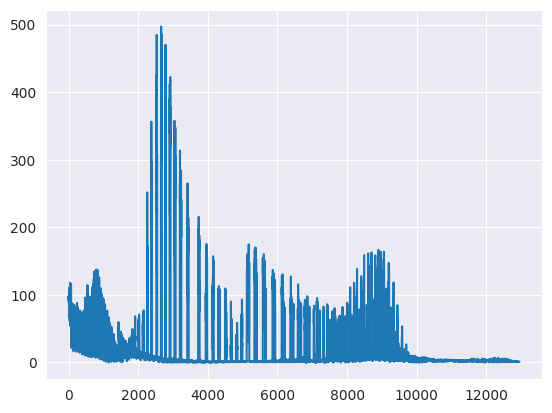

In [36]:
plt.plot(mesh[1])

In [82]:
scale = np.reciprocal(maxs - mins)
mins = mins.reshape(-1,1)
shifted = mesh - mins
print(mesh[:,0])
print(shifted[:, 0])

[94.21795903 94.41938233 21.16378766 21.3156083 ]
[790.28703582  94.41938078 409.41663343  21.31560712]


In [83]:
print(scale)

[0.0005415  0.00084775 0.00132558 0.00257525]


In [85]:
scaledmesh=shifted*scale.reshape(-1,1)

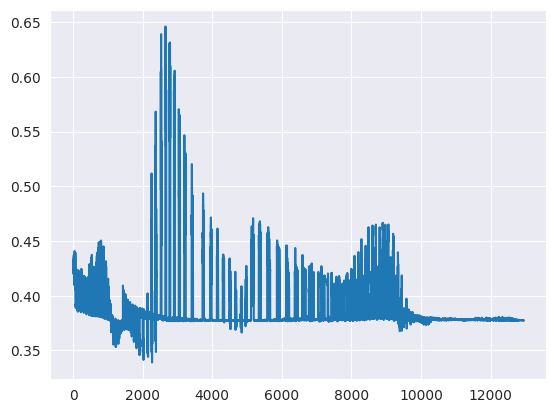

In [86]:
plt.plot(scaledmesh[0])